In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

realtor_data = "Resources/RealtorData.csv"
realtor_file_df = pd.read_csv(realtor_data, encoding="ISO-8859-1")
realtor_file_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1048570,for_sale,5.0,4.0,0.14,Hollis,New York,11423.0,2574.0,11/8/2004,1175000.0
1048571,for_sale,7.0,4.0,0.09,Hollis,New York,11423.0,NaN,12/15/2021,1349000.0
1048572,for_sale,5.0,3.0,0.09,Hollis,New York,11423.0,NaN,7/18/2018,925000.0
1048573,for_sale,4.0,3.0,0.13,Hollis,New York,11423.0,NaN,3/12/2003,1350000.0


In [14]:
realtor_file_df.drop_duplicates()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1048521,for_sale,4.0,3.0,0.09,Rosedale,New York,11422.0,NaN,3/18/2002,849990.0
1048539,for_sale,6.0,5.0,0.09,Rosedale,New York,11422.0,2315.0,4/9/2021,1279000.0
1048543,for_sale,1.0,1.0,NaN,Hollis,New York,11423.0,NaN,2/11/2021,190000.0
1048558,for_sale,1.0,1.0,NaN,Hollis,New York,11423.0,NaN,NaN,179000.0


In [15]:
realtor_file_df['prev_sold_encoded'] = realtor_file_df['prev_sold_date'].map(lambda x: 'Yes' if pd.notna(x) else 'No')
realtor_file_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0,No
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0,No
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0,No
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0,No
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0,No
...,...,...,...,...,...,...,...,...,...,...,...
1048570,for_sale,5.0,4.0,0.14,Hollis,New York,11423.0,2574.0,11/8/2004,1175000.0,Yes
1048571,for_sale,7.0,4.0,0.09,Hollis,New York,11423.0,NaN,12/15/2021,1349000.0,Yes
1048572,for_sale,5.0,3.0,0.09,Hollis,New York,11423.0,NaN,7/18/2018,925000.0,Yes
1048573,for_sale,4.0,3.0,0.13,Hollis,New York,11423.0,NaN,3/12/2003,1350000.0,Yes


In [16]:
realtor_file_df.fillna(0,inplace=True)
new_york_df = realtor_file_df[realtor_file_df['city'] == 'New York']
new_york_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded
465089,for_sale,2.0,2.0,0.0,New York,New York,10021.0,0.0,0,1185000.0,No
465111,for_sale,12.0,14.0,0.0,New York,New York,10014.0,8528.0,0,29995000.0,No
465513,for_sale,2.0,2.0,0.0,New York,New York,10022.0,1425.0,0,895000.0,No
465515,for_sale,1.0,2.0,0.0,New York,New York,10005.0,1166.0,1/10/2014,985000.0,Yes
465516,for_sale,1.0,1.0,0.0,New York,New York,10065.0,761.0,8/18/2020,810000.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1047710,for_sale,1.0,1.0,0.0,New York,New York,10010.0,750.0,6/2/2016,1300000.0,Yes
1047729,for_sale,1.0,1.0,0.0,New York,New York,10025.0,0.0,10/31/2014,625000.0,Yes
1047753,for_sale,3.0,4.0,0.0,New York,New York,10016.0,2880.0,5/19/2017,5750000.0,Yes
1047842,for_sale,2.0,1.0,0.0,New York,New York,11368.0,0.0,1/10/2018,182000.0,Yes


## What are the average real estate prices in New York over the last three years, broken down by both months and quarters?


In [17]:
# Convert 'prev_sold_date' to datetime and create a copy of the DataFrame
new_york_df = new_york_df.copy()
new_york_df['prev_sold_date'] = pd.to_datetime(new_york_df['prev_sold_date'])
new_york_df.loc[:, 'month'] = new_york_df['prev_sold_date'].dt.month
new_york_df.loc[:, 'quarter'] = new_york_df['prev_sold_date'].dt.quarter

# Add a 'year' column
new_york_df.loc[:, 'year'] = new_york_df['prev_sold_date'].dt.year

# Determine the range of years in your dataset
min_year = new_york_df['year'].min()
max_year = new_york_df['year'].max()

# Filter data for the last three years
last_three_years_data = new_york_df[new_york_df['year'].between(new_york_df['year'].max() - 2, new_york_df['year'].max())]

# Group by month and calculate the average price for the last three years
average_prices_monthly_last_three_years = last_three_years_data.groupby('month')['price'].mean().round()

# Group by quarter and calculate the average price for the last three years
average_prices_quarterly_last_three_years = last_three_years_data.groupby('quarter')['price'].mean().round()

# Print the results
print("Average Monthly Prices (Last Three Years):")
print(average_prices_monthly_last_three_years)

print("\nAverage Quarterly Prices (Last Three Years):")
print(average_prices_quarterly_last_three_years)


Average Monthly Prices (Last Three Years):
month
1     8411518.0
2     1895309.0
3     1835567.0
4     2538695.0
5     1670167.0
6     1107025.0
7     5052422.0
8     1643953.0
9      965149.0
10    2275251.0
11    1341972.0
12    1610229.0
Name: price, dtype: float64

Average Quarterly Prices (Last Three Years):
quarter
1    3887829.0
2    1485073.0
3    2946901.0
4    1911888.0
Name: price, dtype: float64


The bar charts visually represent the average real estate prices in New York over the last three years, providing insights into both monthly and quarterly trends.

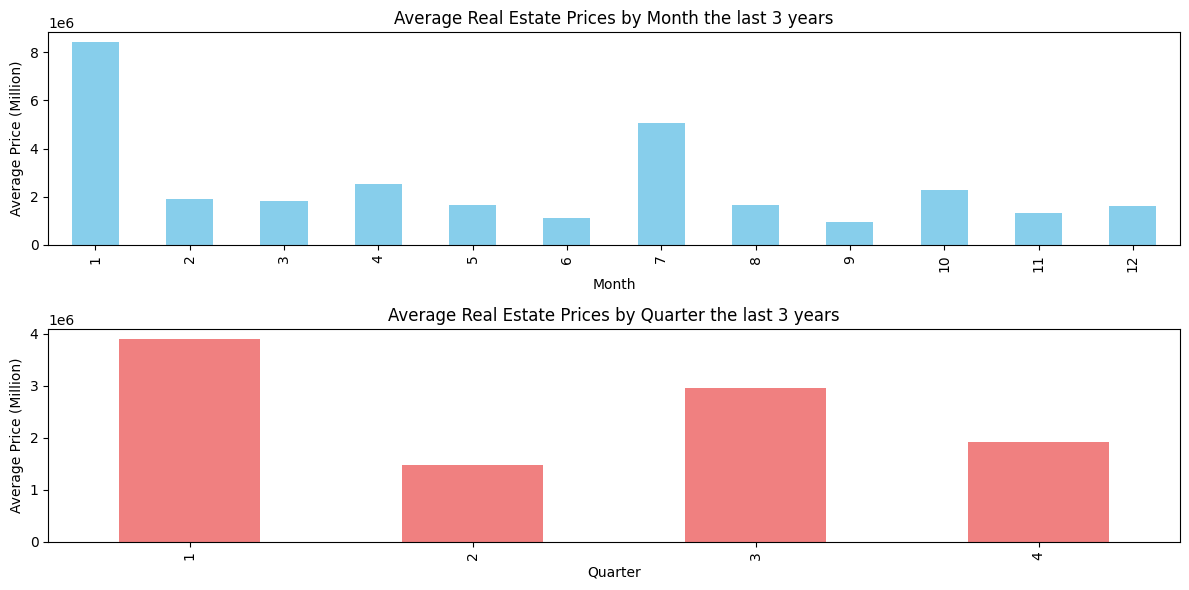

In [18]:
# Plotting
plt.figure(figsize=(12, 6))

# Plotting monthly average prices
plt.subplot(2, 1, 1)
average_prices_monthly_last_three_years.plot(kind='bar', color='skyblue')
plt.title('Average Real Estate Prices by Month the last 3 years')
plt.xlabel('Month')
plt.ylabel('Average Price (Million)')

# Plotting quarterly average prices
plt.subplot(2, 1, 2)
average_prices_quarterly_last_three_years.plot(kind='bar', color='lightcoral')
plt.title('Average Real Estate Prices by Quarter the last 3 years')
plt.xlabel('Quarter')
plt.ylabel('Average Price (Million)')

plt.tight_layout()
plt.show()


Visualizing Price Distributions (Last Three Years):


First Quarter: In light coral, a histogram showcases the distribution of prices in the first quarter, revealing a range from $289,000 to $3.5 million. These visualizations provide insights into market dynamics, aiding in trend identification and outlier detection.

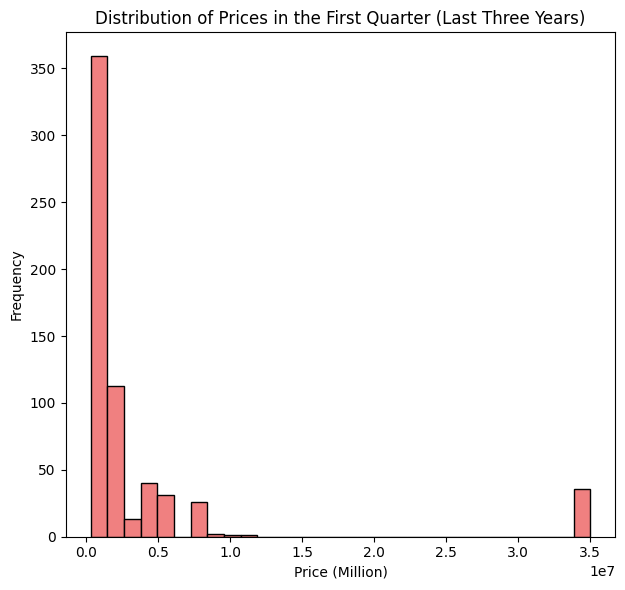

In [19]:
first_month_data_last_three_years = last_three_years_data[last_three_years_data['month'] == 1]
first_quarter_data_last_three_years = last_three_years_data[last_three_years_data['quarter'] == 1]

# Plot histograms for the distribution of prices in the last three years
plt.figure(figsize=(12, 6))



# Histogram for the first quarter in the last three years
plt.subplot(1, 2, 2)
plt.hist(first_quarter_data_last_three_years['price'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Prices in the First Quarter (Last Three Years)')
plt.xlabel('Price (Million)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()